In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

In [2]:
M_worst = np.array([
    [0.60, 0.60, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15],
    [0.32, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.68, 0.00]])

In [3]:
init_vals = np.array([[10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]])
hunt = np.array([[26,5,2,2,2,2,1,1,0,0,0,0,0,0,0,0]])

def hunt_worst_constant(T = 50,init_vals= init_vals):
    
    i = 0
    total_p = np.zeros(T+1)
    tvec = np.arange(T+1)
    while i <=T:
        
        if i == 0:
            x_n = M_worst.dot(init_vals.transpose())
            x_n = x_n - hunt.transpose()
            total_p[i] = sum(x_n)
        else:
            x_n = M_worst.dot(x_n)
            x_n = x_n - hunt.transpose()

            total_p[i] = sum(x_n)
        i = i + 1
        
    return total_p
total_p = hunt_worst_constant()

Text(0, 0.5, 'Population')

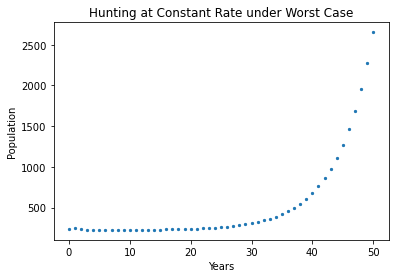

In [4]:
number = np.arange(51)
total_p = hunt_worst_constant()
plt.scatter(number, total_p,s = 5)
plt.title('Hunting at Constant Rate under Worst Case')
plt.xlabel('Years')
plt.ylabel('Population')

In [5]:
D = np.zeros((16,16))
prop = np.array([[0.30,0.1,0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1]])
np.fill_diagonal(D,prop)

def hunt_worst_prop(T = 50,init_vals= init_vals):
    
    i = 0
    total_p = np.zeros(T+1)
    tvec = np.arange(T+1)
    while i <=T:
        
        if i == 0:
            x_n = M_worst.dot(init_vals.transpose())
            x_n = x_n - D.dot(x_n)
            total_p[i] = sum(x_n)
        else:
            x_n = M_worst.dot(x_n)
            x_n = x_n - D.dot(x_n)

            total_p[i] = sum(x_n)
        i = i + 1
        
    return total_p

total_p = hunt_worst_prop()
print(total_p)

[215.1        217.5152     207.96559792 204.21668883 203.68966563
 204.14747271 205.16658352 206.59818108 208.31034233 210.22670243
 212.18883045 214.13823028 216.08848942 218.05814705 220.05176017
 222.07431147 224.07130361 226.06509312 228.08051145 230.12146947
 232.18374816 234.26530079 236.36590833 238.485603   240.62439684
 242.78234653 244.95954662 247.15618773 249.37249353 251.60866514
 253.86488278 256.1413228  258.4381621  260.7555981  263.09382309
 265.45302056 267.83337454 270.23507341 272.65830851 275.10327295
 277.57016156 280.05917094 282.57049949 285.10434741 287.66091669
 290.24041107 292.84303614 295.4689993  298.11850982 300.79177888
 303.4890195 ]


Text(0, 0.5, 'Population')

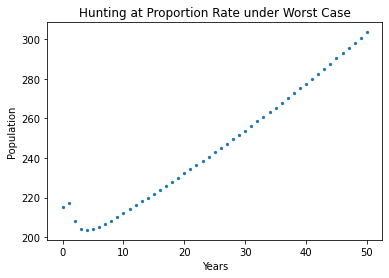

In [6]:
number = np.arange(51)
total_p = hunt_worst_prop()
plt.scatter(number, total_p,s = 5)
plt.title('Hunting at Proportion Rate under Worst Case')
plt.xlabel('Years')
plt.ylabel('Population')